<a href="https://colab.research.google.com/github/arvindnswamy/BoundaryLayers/blob/master/BlasiusFlowOverFlatPlate_BVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The algorithm converged to the desired accuracy.


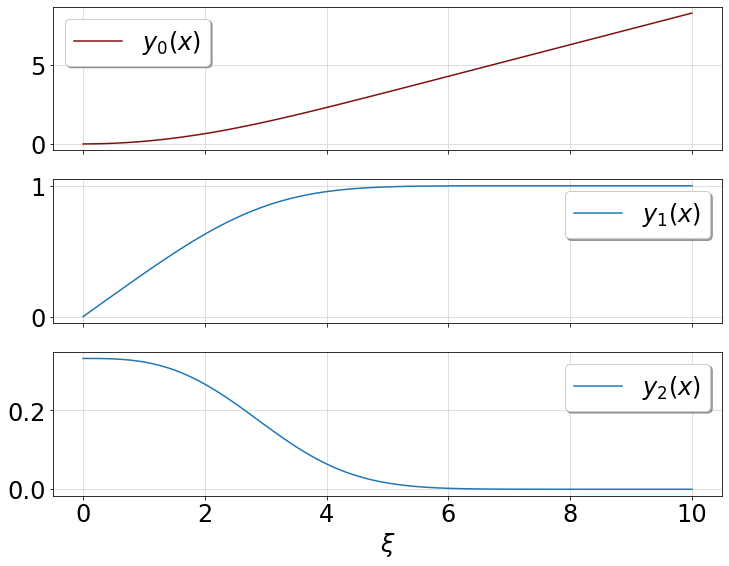

In [12]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib
matplotlib.rcParams['font.size'] = 24

eps = 0.1
def odetobesolved(t, y):
    #when mwedge = 0, you should get bacj the results of the flat plate solution
    #return np.vstack((y[1], -y[1]-(1/eps)*(np.exp(y[0])-t-2))) 
    return np.vstack((y[1], y[2], -0.5*y[0]*y[2])) 

def odebc(ya, yb):
    return np.array([ya[0], ya[1],  yb[1]-1.0])

from scipy.integrate import solve_bvp
n = 100
x = np.linspace(0, 10, n)
y = np.array([(1-np.exp(-x))*x, 1-np.exp(-x), x*np.exp(-x)]) #initial guess

sol = solve_bvp(odetobesolved, odebc, x, y)

if sol.status != 0:
    print("WARNING: sol.status is %d" % sol.status)
print(sol.message)


f, (ax1, ax2, ax3) = plt.subplots(3,  figsize=(12,9), sharex=True)
#plt.subplot(3, 1, 1)
ax1.plot(sol.x, sol.y[0], color='#801010', label='$y_0(x)$')
ax1.grid(alpha=0.5)
ax1.legend(framealpha=1, shadow=True)
#
#plt.subplot(3, 1, 2)
ax2.plot(sol.x, sol.y[1], '-', color='C0', label='$y_1(x)$')
#ax2.xlabel('$x$')
ax2.grid(alpha=0.5)
ax2.legend(framealpha=1, shadow=True)
#
#plt.subplot(3, 1, 3)
ax3.plot(sol.x, sol.y[2], '-', color='C0', label='$y_2(x)$')
ax3.set_xlabel(r'$\xi$')
ax3.grid(alpha=0.5)
ax3.legend(framealpha=1, shadow=True)
plt.show()